In [61]:
#!pip install dataretrieval
from dataretrieval import nwis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
startDate   =  "1995-10-01"
endDate     =  "2024-09-30"
model_months=  [6 ,7,8]
model_site  = ["12305000","12322000"
              ,"13092747","13150430","13154500","13176400","13190500","13192200","13211205","13213000","13296000","13304050","13307000","13310800","13310850","13311000","13311250","13311450","13317660","13337095","13340000","13340600","13341050","13342500"
              ]
idv         = [ "00060_Mean" ,"tmean" ,"Days_Since_October_1st" ]

In [63]:
site_info = nwis.get_info(sites= model_site )
site_info_df = pd.DataFrame( site_info[0] )
site_info_df["site_no"]=site_info_df["site_no"].astype(str)
columns_to_save = ['site_no', 'dec_lat_va', 'dec_long_va', 'drain_area_va'
                   ,   'alt_va'
                  ]
filtered_df = site_info_df[columns_to_save]



parameterCode = ["00010","00060"  ]
dailyStreamtemp = nwis.get_dv(sites= model_site
                              , parameterCd=parameterCode, start=startDate, end=endDate)
dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year
dailyStreamtemp_df = dailyStreamtemp_df[ dailyStreamtemp_df['Month'].isin( model_months  )    ]
print( dailyStreamtemp_df.head() )

      site_no                  datetime  00010_Maximum 00010_Maximum_cd  \
244  12305000 1996-06-01 00:00:00+00:00            NaN              NaN   
245  12305000 1996-06-02 00:00:00+00:00            NaN              NaN   
246  12305000 1996-06-03 00:00:00+00:00            NaN              NaN   
247  12305000 1996-06-04 00:00:00+00:00            NaN              NaN   
248  12305000 1996-06-05 00:00:00+00:00            NaN              NaN   

     00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd  00060_Mean  \
244            NaN              NaN         NaN           NaN     39200.0   
245            NaN              NaN         NaN           NaN     39400.0   
246            NaN              NaN         NaN           NaN     41300.0   
247            NaN              NaN         NaN           NaN     44400.0   
248            NaN              NaN         NaN           NaN     42700.0   

    00060_Mean_cd  ...  00010_2_Mean_cd 00010_temperature ysi_Maximum  \
244          

In [64]:
shared_url = "https://drive.google.com/file/d/1z9w4rk21CCbbuOjwsru1pgkiOsYgVX6h/view?usp=share_link"
file_id = shared_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

prism_df = pd.read_csv(download_url)

prism_df['date'] = pd.to_datetime( prism_df['date'])
def days_since_october_first(date):
    october_first = pd.Timestamp(year=date.year, month=10, day=1)
    days_difference = (date - october_first).days
    return days_difference if days_difference >= 0 else days_difference + 365

prism_df['Days_Since_October_1st'] =  prism_df['date'].apply(days_since_october_first)
prism_df[ "rad_d"   ] = 2 * np.pi * prism_df[ "Days_Since_October_1st"   ] /365
#prism_df["site_no"] =prism_df["site_no"].astype(str)

# Add a leading 0 to strings with exactly 7 characters
prism_df['site_no'] = prism_df['site_no'].astype(str).apply(lambda x: '0' + x if len(x) == 7 else x)
#prism_df['site_no'] = prism_df['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)
#prism_df["site_no"] =prism_df["site_no"].astype(str)
prism_df['Date'] = prism_df['date'].dt.date
print( prism_df)

             date      tmean   site_no  Days_Since_October_1st     rad_d  \
0      1995-01-01 -18.306002  06038800                      92  1.583707   
1      1995-01-02 -17.829000  06038800                      93  1.600921   
2      1995-01-03 -18.317001  06038800                      94  1.618135   
3      1995-01-04 -15.904000  06038800                      95  1.635350   
4      1995-01-05 -11.903001  06038800                      96  1.652564   
...           ...        ...       ...                     ...       ...   
282875 2024-10-10  14.149199  13342500                       9  0.154928   
282876 2024-10-11  13.611249  13342500                      10  0.172142   
282877 2024-10-12  16.385151  13342500                      11  0.189356   
282878 2024-10-13  14.676150  13342500                      12  0.206570   
282879 2024-10-14  16.204950  13342500                      13  0.223785   

              Date  
0       1995-01-01  
1       1995-01-02  
2       1995-01-03  
3  

In [65]:
# Define the columns you want to keep for each DataFrame
prism_cols = [ 'site_no', 'Date', 'rad_d', 'Days_Since_October_1st', 'tmean']
stream_cols = ['Date', 'site_no', '00010_Mean', '00060_Mean', 'Month', 'Year']

prism_df = prism_df[ prism_cols ]
dailyStreamtemp_df = dailyStreamtemp_df[ stream_cols ]
result = pd.merge(prism_df, dailyStreamtemp_df, on=['Date','site_no'], how='inner')

# Count the number of NaN values in each column
na_count = result.isna().sum()
# Print the result
#print(na_count)
# Drop rows with any NaN values
df_cleaned = result.dropna()
# Print the cleaned DataFrame
#print(df_cleaned.head())
# Count the number of NaN values in each column
na_count = df_cleaned.isna().sum()
# Print the result
#print(na_count )

In [66]:
df_cleaned

,site_no,Date,rad_d,Days_Since_October_1st,tmean,00010_Mean,00060_Mean,Month,Year
42,13092747,1996-07-13,4.906049,285,23.403002,18.6,120.0,7,1996
43,13092747,1996-07-14,4.923263,286,23.366001,18.4,130.0,7,1996
44,13092747,1996-07-15,4.940477,287,24.110001,18.3,132.0,7,1996
45,13092747,1996-07-16,4.957691,288,21.022001,17.9,134.0,7,1996
46,13092747,1996-07-17,4.974906,289,21.528002,18.0,155.0,7,1996
...,...,...,...,...,...,...,...,...,...
43922,13342500,2024-08-27,5.680688,330,17.330099,11.4,10500.0,8,2024
43923,13342500,2024-08-28,5.697902,331,15.716600,10.9,10600.0,8,2024
43924,13342500,2024-08-29,5.715116,332,18.979599,11.1,10600.0,8,2024
43925,13342500,2024-08-30,5.732331,333,22.762400,11.3,10500.0,8,2024


In [67]:
def calculate_correlation_matrix(df, site_col='site_no', date_col='Date', value_col='00010_Mean'):
    """
    Calculates the correlation matrix between sites based on a common date range.

    Args:
        df (pd.DataFrame): The input DataFrame with columns for site, date, and a numeric value.
        site_col (str): The name of the column containing site identifiers. Defaults to 'site'.
        date_col (str): The name of the column containing date values. Defaults to 'Date'.
        value_col (str): The name of the column containing the numeric values for correlation. Defaults to '00010_Mean'.

    Returns:
        pd.DataFrame: A correlation matrix where rows and columns represent sites,
                      and values represent the correlation between the sites based on
                      their common date range.  Returns an empty DataFrame if no
                      sites have overlapping dates.
    """

    # Check if the required columns exist
    if not all(col in df.columns for col in [site_col, date_col, value_col]):
        raise ValueError(f"DataFrame must contain columns: {site_col}, {date_col}, {value_col}")

    # Pivot the dataframe to have sites as columns and dates as rows
    try:
        df_pivot = df.pivot(index=date_col, columns=site_col, values=value_col)
    except ValueError as e:
        if "No common values" in str(e):
            return pd.DataFrame()  # Return an empty DataFrame
        else:
            raise e # Re-raise if it is a different error

    # Drop rows where all site values are NaN
    df_pivot = df_pivot.dropna(how='all')

    # Calculate the correlation matrix
    correlation_matrix = df_pivot.corr()

    return correlation_matrix




In [68]:
# Calculate the correlation matrix
correlation_matrix = calculate_correlation_matrix( df_cleaned )
print( type(correlation_matrix) )
print(correlation_matrix)

<class 'pandas.core.frame.DataFrame'>
site_no   12305000  12322000  13092747  13150430  13154500  13176400  \
site_no                                                                
12305000  1.000000  0.881117  0.427084  0.374957  0.551577  0.532809   
12322000  0.881117  1.000000  0.496033  0.432373  0.649903  0.615647   
13092747  0.427084  0.496033  1.000000  0.825127  0.844120  0.855048   
13150430  0.374957  0.432373  0.825127  1.000000  0.789110  0.840622   
13154500  0.551577  0.649903  0.844120  0.789110  1.000000  0.901200   
13176400  0.532809  0.615647  0.855048  0.840622  0.901200  1.000000   
13190500  0.660434  0.682199  0.073073  0.044032  0.179556  0.161641   
13192200  0.583658  0.450069  0.138782  0.209452  0.362566  0.244718   
13211205  0.695006  0.731755  0.590448  0.574537  0.655645  0.751685   
13213000  0.886244  0.875861  0.693389  0.772895  0.847464  0.846647   
13296000  0.754932  0.843653  0.628605  0.661380  0.727635  0.745040   
13304050  0.786803  0.7081

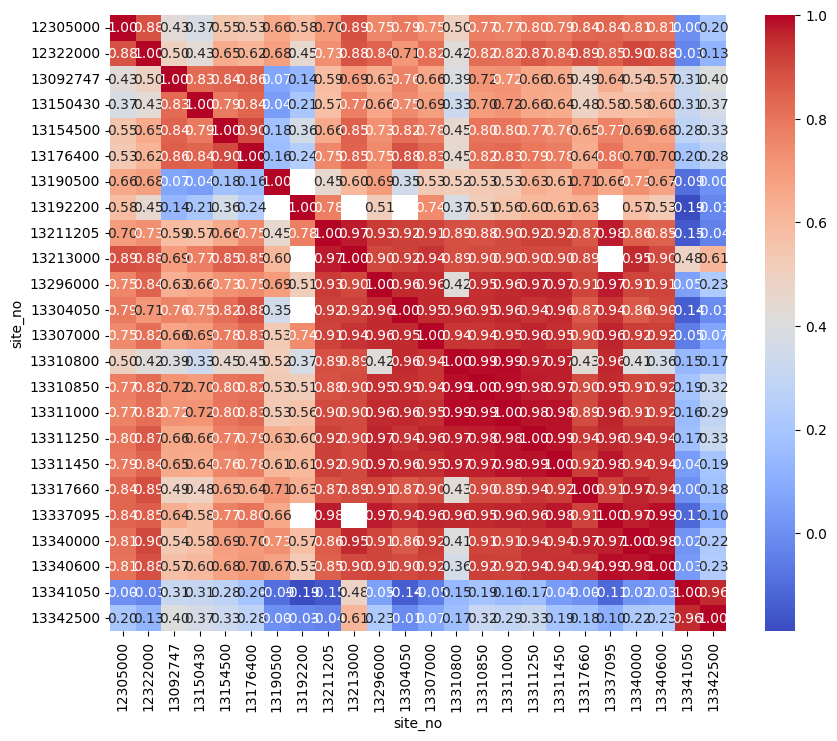

In [69]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap( correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
#plt.title("Pairwise correlations between summer stream temperatures")
plt.show()

In [70]:
correlation_matrix[ correlation_matrix>0.95 ]

site_no,12305000,12322000,13092747,13150430,13154500,13176400,13190500,13192200,13211205,13213000,...,13310850,13311000,13311250,13311450,13317660,13337095,13340000,13340600,13341050,13342500
site_no,,,,,,,,,,,,,,,,,,,,,
12305000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12322000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13092747,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13150430,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13154500,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13176400,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13190500,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13192200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13211205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.973142,...,NaN,NaN,NaN,NaN,NaN,0.975004,NaN,NaN,NaN,NaN


In [71]:
correlation_matrix[ correlation_matrix <0 ]

site_no,12305000,12322000,13092747,13150430,13154500,13176400,13190500,13192200,13211205,13213000,...,13310850,13311000,13311250,13311450,13317660,13337095,13340000,13340600,13341050,13342500
site_no,,,,,,,,,,,,,,,,,,,,,
12305000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12322000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030713,NaN
13092747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13150430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13154500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13176400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13190500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.091805,NaN
13192200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.189040,-0.026172
13211205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.148471,-0.039179
